In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
import semopy
import pandas as pd
from semopy import Model
import scipy.stats as stats 
from itertools import groupby
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
plt.rc('font',family='Times New Roman')

In [3]:
pathturn11 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fanew\turn1"
filesturn11= os.listdir(pathturn11)
pathturn12 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fanew\turn2"
filesturn12= os.listdir(pathturn12)
pathturn13 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fanew\turn3"
filesturn13= os.listdir(pathturn13)
pathturn14 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fanew\turn4"
filesturn14= os.listdir(pathturn14)
pathturn15 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fanew\turn5"
filesturn15= os.listdir(pathturn15)

pathturn11c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chinew\turn1"
filesturn11c= os.listdir(pathturn11c)
pathturn12c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chinew\turn2"
filesturn12c= os.listdir(pathturn12c)
pathturn13c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chinew\turn3"
filesturn13c= os.listdir(pathturn13c)
pathturn14c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chinew\turn4"
filesturn14c= os.listdir(pathturn14c)
pathturn15c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chinew\turn5"
filesturn15c= os.listdir(pathturn15c)

In [4]:
pathturn21 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fanew\turn1"
filesturn21= os.listdir(pathturn21)
pathturn22 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fanew\turn2"
filesturn22= os.listdir(pathturn22)
#pathturn23 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fanew\turn3"
#filesturn23= os.listdir(pathturn23)
pathturn24 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fanew\turn4"
filesturn24= os.listdir(pathturn24)
pathturn25 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fanew\turn5"
filesturn25= os.listdir(pathturn25)
pathturn26 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fanew\turn6"
filesturn26= os.listdir(pathturn26)

pathturn21c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chinew\turn1"
filesturn21c= os.listdir(pathturn21c)
pathturn22c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chinew\turn2"
filesturn22c= os.listdir(pathturn22c)
#pathturn23c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chinew\turn3"
#filesturn23c= os.listdir(pathturn23c)
pathturn24c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chinew\turn4"
filesturn24c= os.listdir(pathturn24c)
pathturn25c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chinew\turn5"
filesturn25c= os.listdir(pathturn25c)
pathturn26c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chinew\turn6"
filesturn26c= os.listdir(pathturn26c)

In [5]:
#print(len(filesturn21),len(filesturn22),len(filesturn23),len(filesturn24),len(filesturn25),len(filesturn26))

In [6]:
pathturn61 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn1"
filesturn61= os.listdir(pathturn61)
pathturn62 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn2"
filesturn62= os.listdir(pathturn62)
pathturn63 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn3"
filesturn63= os.listdir(pathturn63)
pathturn64 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn4"
filesturn64= os.listdir(pathturn64)
pathturn65 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn5"
filesturn65= os.listdir(pathturn65)
pathturn66 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn6"
filesturn66= os.listdir(pathturn66)
pathturn67 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn7"
filesturn67= os.listdir(pathturn67)
pathturn68 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fanew\turn8"
filesturn68= os.listdir(pathturn68)


pathturn61c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn1"
filesturn61c= os.listdir(pathturn61c)
pathturn62c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn2"
filesturn62c= os.listdir(pathturn62c)
pathturn63c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn3"
filesturn63c= os.listdir(pathturn63c)
pathturn64c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn4"
filesturn64c= os.listdir(pathturn64c)
pathturn65c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn5"
filesturn65c= os.listdir(pathturn65c)
pathturn66c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn6"
filesturn66c= os.listdir(pathturn66c)
pathturn67c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn7"
filesturn67c= os.listdir(pathturn67c)
pathturn68c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chinew\turn8"
filesturn68c= os.listdir(pathturn68c)


In [7]:
print(len(filesturn61),len(filesturn62),len(filesturn63),len(filesturn64),len(filesturn65),len(filesturn66),len(filesturn67),len(filesturn68))

3 2 1 6 3 1 1 4


In [8]:
pathturn71 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn1"
filesturn71= os.listdir(pathturn71)
pathturn72 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn2"
filesturn72= os.listdir(pathturn72)
pathturn73 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn3"
filesturn73= os.listdir(pathturn73)
pathturn74 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn4"
filesturn74= os.listdir(pathturn74)
pathturn75 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn5"
filesturn75= os.listdir(pathturn75)
pathturn76 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn6"
filesturn76= os.listdir(pathturn76)
pathturn77 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn7"
filesturn77= os.listdir(pathturn77)
pathturn78 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn8"
filesturn78= os.listdir(pathturn78)
pathturn79 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn9"
filesturn79= os.listdir(pathturn79)
pathturn710 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn10"
filesturn710= os.listdir(pathturn710)
pathturn711 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fanew\turn11"
filesturn711= os.listdir(pathturn711)

pathturn71c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn1"
filesturn71c= os.listdir(pathturn71c)
pathturn72c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn2"
filesturn72c= os.listdir(pathturn72c)
pathturn73c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn3"
filesturn73c= os.listdir(pathturn73c)
pathturn74c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn4"
filesturn74c= os.listdir(pathturn74c)
pathturn75c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn5"
filesturn75c= os.listdir(pathturn75c)
pathturn76c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn6"
filesturn76c= os.listdir(pathturn76c)
pathturn77c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn7"
filesturn77c= os.listdir(pathturn77c)
pathturn78c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn8"
filesturn78c= os.listdir(pathturn78c)
pathturn79c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn9"
filesturn79c= os.listdir(pathturn79c)
pathturn710c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn10"
filesturn710c= os.listdir(pathturn710c)
pathturn711c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chinew\turn11"
filesturn711c= os.listdir(pathturn711c)

In [9]:
print(len(filesturn71),len(filesturn72),len(filesturn73),len(filesturn74),len(filesturn75),len(filesturn76),len(filesturn77),len(filesturn78),len(filesturn79),len(filesturn710))

3 1 3 4 3 2 2 1 1 6


In [10]:
pathturn81 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn1"
filesturn81= os.listdir(pathturn81)
pathturn82 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn2"
filesturn82= os.listdir(pathturn82)
pathturn83 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn3"
filesturn83= os.listdir(pathturn83)
pathturn84 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn4"
filesturn84= os.listdir(pathturn84)
pathturn85 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn5"
filesturn85= os.listdir(pathturn85)
pathturn86 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn6"
filesturn86= os.listdir(pathturn86)
pathturn87 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn7"
filesturn87= os.listdir(pathturn87)
#pathturn88 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn8"
#filesturn88= os.listdir(pathturn88)
pathturn89 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn9"
filesturn89= os.listdir(pathturn89)
pathturn810 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn10"
filesturn810= os.listdir(pathturn810)


pathturn81c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn1"
filesturn81c= os.listdir(pathturn81c)
pathturn82c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn2"
filesturn82c= os.listdir(pathturn82c)
pathturn83c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn3"
filesturn83c= os.listdir(pathturn83c)
pathturn84c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn4"
filesturn84c= os.listdir(pathturn84c)
pathturn85c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn5"
filesturn85c= os.listdir(pathturn85c)
pathturn86c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn6"
filesturn86c= os.listdir(pathturn86c)
pathturn87c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn7"
filesturn87c= os.listdir(pathturn87c)
#pathturn88c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn8"
#filesturn88c= os.listdir(pathturn88c)
pathturn89c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn9"
filesturn89c= os.listdir(pathturn89c)
pathturn810c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn10"
filesturn810c= os.listdir(pathturn810c)


In [11]:
#pathturn811 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn11"
#filesturn811= os.listdir(pathturn811)
pathturn812 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn12"
filesturn812= os.listdir(pathturn812)
pathturn813 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn13"
filesturn813= os.listdir(pathturn813)
pathturn814 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn14"
filesturn814= os.listdir(pathturn814)
pathturn815 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn15"
filesturn815= os.listdir(pathturn815)
pathturn816 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn16"
filesturn816= os.listdir(pathturn816)
pathturn817 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn17"
filesturn817= os.listdir(pathturn817)
pathturn818 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn18"
filesturn818= os.listdir(pathturn818)
pathturn819 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn19"
filesturn819= os.listdir(pathturn819)
pathturn820 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn20"
filesturn820= os.listdir(pathturn820)
pathturn821 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn21"
filesturn821= os.listdir(pathturn821)
pathturn822 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fanew\turn22"
filesturn822= os.listdir(pathturn822)


#pathturn811c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn11"
#filesturn811c= os.listdir(pathturn811c)
pathturn812c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn12"
filesturn812c= os.listdir(pathturn812c)
pathturn813c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn13"
filesturn813c= os.listdir(pathturn813c)
pathturn814c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn14"
filesturn814c= os.listdir(pathturn814c)
pathturn815c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn15"
filesturn815c= os.listdir(pathturn815c)
pathturn816c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn16"
filesturn816c= os.listdir(pathturn816c)
pathturn817c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn17"
filesturn817c= os.listdir(pathturn817c)
pathturn818c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn18"
filesturn818c= os.listdir(pathturn818c)
pathturn819c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn19"
filesturn819c= os.listdir(pathturn819c)
pathturn820c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn20"
filesturn820c= os.listdir(pathturn820c)
pathturn821c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn21"
filesturn821c= os.listdir(pathturn821c)
pathturn822c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chinew\turn22"
filesturn822c= os.listdir(pathturn822c)

In [12]:
pathturn91 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\block\fanew\turn1"
filesturn91= os.listdir(pathturn91)
pathturn91c = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\block\chinew\turn1"
filesturn91c= os.listdir(pathturn91c)

In [13]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [14]:
def normalizea(x, maxa,mina,axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [15]:
def normalizei(x, maxi,mini,axis=0):
    return [(float(i)-mini)/float(maxi-mini) for i in x]

In [16]:
def f0fitintera(path,files,maxa,mina):
    t1=[]
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        times = librosa.times_like(f0,sr=sr1,hop_length=128)
        duration=librosa.get_duration(y=x, sr=sr1)
        logf0nomal=normalizea(f0,maxa,mina)
        timesp=pd.DataFrame(times)
        logf0nomalp=pd.DataFrame(logf0nomal)
        indxnan = logf0nomalp.fillna(method='ffill').dropna().index
        res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
        f0out=logf0nomalp.loc[res_idx]
        timesout = timesp.loc[res_idx]
        timesout=timesout-timesout.min()
        timesnumpy=timesout.to_numpy()
        f0outnumpy=f0out.to_numpy()
        logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
        timesnan = timesnumpy[~np.isnan(f0outnumpy)]
        f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
        ynew=f(timesnumpy)
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        label=0
        t=(starttime,ynew,label)
        t1.append(t)
    return t1

In [17]:
def f0fitinteri(path,files,maxi,mini):
    t1=[]
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        times = librosa.times_like(f0,sr=sr1,hop_length=128)
        duration=librosa.get_duration(y=x, sr=sr1)
        logf0nomal=normalizei(f0,maxi,mini)
        timesp=pd.DataFrame(times)
        logf0nomalp=pd.DataFrame(logf0nomal)
        indxnan = logf0nomalp.fillna(method='ffill').dropna().index
        res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
        f0out=logf0nomalp.loc[res_idx]
        timesout = timesp.loc[res_idx]
        timesout=timesout-timesout.min()
        timesnumpy=timesout.to_numpy()
        f0outnumpy=f0out.to_numpy()
        logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
        timesnan = timesnumpy[~np.isnan(f0outnumpy)]
        f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
        ynew=f(timesnumpy)
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        label=1
        t=(starttime,ynew,label)
        t1.append(t)
    return t1

In [18]:
def diffc(pathturn,filesturn,pathturnc,filesturnc,maxa,mina,maxi,mini):
    t=f0fitintera(pathturn,filesturn,maxa,mina)
    tc=f0fitinteri(pathturnc,filesturnc,maxi,mini)
    alltest=t+tc
    alltest.sort(key = lambda x: x[0])
    #print(alltest)
    labelss=np.zeros((len(alltest),1))
    for i in range(len(alltest)):
        labelss[i]=alltest[i][2]
    
    groupsdtw = [(k1, sum(1 for _ in g1)) for k1, g1 in groupby(labelss)]
    groupndtw=np.zeros((len(groupsdtw),1))
    for i in range(len(groupsdtw)):
        groupndtw[i]=groupsdtw[i][1]
    inddtw=np.zeros((len(groupndtw),2))
    for i in range(len(groupndtw)):
        if i!=len(groupndtw):
            inddtw[i,:]=np.c_[sum(groupndtw[0:i]),sum(groupndtw[0:i+1])]
    diff=np.zeros((len(inddtw)-1,1))
    for i in range(len(inddtw)-1):
        ynewff=alltest[int(inddtw[i,0]):int(inddtw[i,1])]
        ynewss=alltest[int(inddtw[i+1,0]):int(inddtw[i+1,1])]
        dtwjjc=0
        jj=0
        for j1 in range(len(ynewff)):
            for j2 in range(len(ynewss)):
                dtwjj,path = fastdtw(ynewff[j1][1],ynewss[j2][1],dist=euclidean)
                dtwjjc=dtwjjc+dtwjj
                jj=jj+1
        diff[i]=dtwjjc/jj
        
    xlabel=(np.arange(len(diff))+1)
    return diff,xlabel

In [19]:
diffc11,xlabel11=diffc(pathturn11,filesturn11,pathturn11c,filesturn11c,590,120,999.6,120)
diffc12,xlabel12=diffc(pathturn12,filesturn12,pathturn12c,filesturn12c,590,120,999.6,120)
diffc13,xlabel13=diffc(pathturn13,filesturn13,pathturn13c,filesturn13c,590,120,999.6,120)
diffc14,xlabel14=diffc(pathturn14,filesturn14,pathturn14c,filesturn14c,590,120,999.6,120)
diffc15,xlabel15=diffc(pathturn15,filesturn15,pathturn15c,filesturn15c,590,120,999.6,120)

In [20]:
diffc1=np.r_[diffc11,diffc12,diffc13,diffc14,diffc15]
xlabel1=np.r_[xlabel11,xlabel12,xlabel13,xlabel14,xlabel15]

In [21]:
diffc1l=np.c_[diffc11[0,:],diffc12[0,:],diffc13[0,:],diffc14[0,:],diffc15[0,:]]
diffc1r=np.c_[diffc11[-1,:],diffc12[-1,:],diffc13[-1,:],diffc14[-1,:],diffc15[-1,:]]
diffc1lr=np.r_[diffc1l.T,diffc1r.T]
diffc1lrz=normalize(diffc1lr,axis=0)
diffc1lrzl=diffc1lrz[0:5,:]
diffc1lrzr=diffc1lrz[5:10,:]

In [22]:
diffc21,xlabel21=diffc(pathturn21,filesturn21,pathturn21c,filesturn21c,597.8,120,999.6,120)
diffc22,xlabel22=diffc(pathturn22,filesturn22,pathturn22c,filesturn22c,597.8,120,999.6,120)
#diffc23,xlabel23=diffc(pathturn23,filesturn23,pathturn23c,filesturn23c,597.8,120,999.6,120)
diffc24,xlabel24=diffc(pathturn24,filesturn24,pathturn24c,filesturn24c,597.8,120,999.6,120)
diffc25,xlabel25=diffc(pathturn25,filesturn25,pathturn25c,filesturn25c,597.8,120,999.6,120)
diffc26,xlabel26=diffc(pathturn26,filesturn26,pathturn26c,filesturn26c,597.8,120,999.6,120)

In [23]:
diffc2=np.r_[diffc21,diffc22,diffc24,diffc25,diffc26]
xlabel2=np.r_[xlabel21,xlabel22,xlabel24,xlabel25,xlabel26]

In [24]:
diffc2l=np.c_[diffc21[0,:],diffc22[0,:],diffc24[0,:],diffc25[0,:]]
diffc2r=np.c_[diffc21[-1,:],diffc22[-1,:],diffc24[-1,:],diffc25[-1,:]]
diffc2lr=np.r_[diffc2l.T,diffc2r.T]
diffc2lrz=normalize(diffc2lr,axis=0)
diffc2lrzl=diffc2lrz[0:6,:]
diffc2lrzr=diffc2lrz[6:12,:]

In [25]:
diffc61,xlabel61=diffc(pathturn61,filesturn61,pathturn61c,filesturn61c,590.94,122.1,999.6,120)
diffc62,xlabel62=diffc(pathturn62,filesturn62,pathturn62c,filesturn62c,590.94,122.1,999.6,120)
diffc63,xlabel63=diffc(pathturn63,filesturn63,pathturn63c,filesturn63c,590.94,122.1,999.6,120)
diffc64,xlabel64=diffc(pathturn64,filesturn64,pathturn64c,filesturn64c,590.94,122.1,999.6,120)
diffc65,xlabel65=diffc(pathturn65,filesturn65,pathturn65c,filesturn65c,590.94,122.1,999.6,120)
diffc66,xlabel66=diffc(pathturn66,filesturn66,pathturn66c,filesturn66c,590.94,122.1,999.6,120)
diffc67,xlabel67=diffc(pathturn67,filesturn67,pathturn67c,filesturn67c,590.94,122.1,999.6,120)
diffc68,xlabel68=diffc(pathturn68,filesturn68,pathturn68c,filesturn68c,590.94,122.1,999.6,120)

In [26]:
diffc6=np.r_[diffc61,diffc62,diffc63,diffc64,diffc65,diffc66,diffc67,diffc68]
xlabel6=np.r_[xlabel61,xlabel62,xlabel63,xlabel64,xlabel65,xlabel66,xlabel67,xlabel68]

In [27]:
diffc6l=np.c_[diffc61[0,:],diffc62[0,:],diffc63[0,:],diffc64[0,:],diffc65[0,:],diffc66[0,:],diffc67[0,:],diffc68[0,:]]
diffc6r=np.c_[diffc61[-1,:],diffc62[-1,:],diffc63[-1,:],diffc64[-1,:],diffc65[-1,:],diffc66[-1,:],diffc67[-1,:],diffc68[-1,:]]
diffc6lr=np.r_[diffc6l.T,diffc6r.T]
diffc6lrz=normalize(diffc6lr,axis=0)
diffc6lrzl=diffc6lrz[0:8,:]
diffc6lrzr=diffc6lrz[8:16,:]

In [28]:
diffc71,xlabel71=diffc(pathturn71,filesturn71,pathturn71c,filesturn71c,597.82,120,999.6,120)
diffc72,xlabel72=diffc(pathturn72,filesturn72,pathturn72c,filesturn72c,597.82,120,999.6,120)
diffc73,xlabel73=diffc(pathturn73,filesturn73,pathturn73c,filesturn73c,597.82,120,999.6,120)
diffc74,xlabel74=diffc(pathturn74,filesturn74,pathturn74c,filesturn74c,597.82,120,999.6,120)
diffc75,xlabel75=diffc(pathturn75,filesturn75,pathturn75c,filesturn75c,597.82,120,999.6,120)
diffc76,xlabel76=diffc(pathturn76,filesturn76,pathturn76c,filesturn76c,597.82,120,999.6,120)
diffc77,xlabel77=diffc(pathturn77,filesturn77,pathturn77c,filesturn77c,597.82,120,999.6,120)
diffc78,xlabel78=diffc(pathturn78,filesturn78,pathturn78c,filesturn78c,597.82,120,999.6,120)
diffc79,xlabel79=diffc(pathturn79,filesturn79,pathturn79c,filesturn79c,597.82,120,999.6,120)
diffc710,xlabel710=diffc(pathturn710,filesturn710,pathturn710c,filesturn710c,597.82,120,999.6,120)
diffc711,xlabel711=diffc(pathturn711,filesturn711,pathturn711c,filesturn711c,597.82,120,999.6,120)

In [29]:
diffc7=np.r_[diffc71,diffc72,diffc73,diffc74,diffc75,diffc76,diffc77,diffc78,diffc79,diffc710,diffc711]
xlabel7=np.r_[xlabel71,xlabel72,xlabel73,xlabel74,xlabel75,xlabel76,xlabel77,xlabel78,xlabel79,xlabel710,xlabel711]

In [30]:
diffc7l=np.c_[diffc71[0,:],diffc72[0,:],diffc73[0,:],diffc74[0,:],diffc75[0,:],diffc76[0,:],diffc77[0,:],diffc78[0,:],diffc79[0,:],diffc710[0,:],diffc711[0,:]]
diffc7r=np.c_[diffc71[-1,:],diffc72[-1,:],diffc73[-1,:],diffc74[-1,:],diffc75[-1,:],diffc76[-1,:],diffc77[-1,:],diffc78[-1,:],diffc79[-1,:],diffc710[-1,:],diffc711[-1,:]]
diffc7lr=np.r_[diffc7l.T,diffc7r.T]
diffc7lrz=normalize(diffc7lr,axis=0)
diffc7lrzl=diffc7lrz[0:11,:]
diffc7lrzr=diffc7lrz[11:22,:]

In [31]:
diffc81,xlabel81=diffc(pathturn81,filesturn81,pathturn81c,filesturn81c,597.82,120,999.6,120)
diffc82,xlabel82=diffc(pathturn82,filesturn82,pathturn82c,filesturn82c,597.82,120,999.6,120)
diffc83,xlabel83=diffc(pathturn83,filesturn83,pathturn83c,filesturn83c,597.82,120,999.6,120)
diffc84,xlabel84=diffc(pathturn84,filesturn84,pathturn84c,filesturn84c,597.82,120,999.6,120)
diffc85,xlabel85=diffc(pathturn85,filesturn85,pathturn85c,filesturn85c,597.82,120,999.6,120)
diffc86,xlabel86=diffc(pathturn86,filesturn86,pathturn86c,filesturn86c,597.82,120,999.6,120)
diffc87,xlabel87=diffc(pathturn87,filesturn87,pathturn87c,filesturn87c,597.82,120,999.6,120)
#diffc88,xlabel88=diffc(pathturn88,filesturn88,pathturn88c,filesturn88c,597.82,120,999.6,120)
diffc89,xlabel89=diffc(pathturn89,filesturn89,pathturn89c,filesturn89c,597.82,120,999.6,120)
diffc810,xlabel810=diffc(pathturn810,filesturn810,pathturn810c,filesturn810c,597.82,120,999.6,120)

In [62]:
tdiffc81=np.r_[diffc81,diffc82,diffc83,diffc84,diffc85,diffc86,diffc87,diffc89]
txlabel81=np.r_[xlabel81,xlabel82,xlabel83,xlabel84,xlabel85,xlabel86,xlabel87,xlabel89]

In [64]:
tdiffc81l=np.c_[diffc81[0,:],diffc82[0,:],diffc83[0,:],diffc84[0,:],diffc85[0,:],diffc86[0,:],diffc87[0,:],diffc89[0,:]]
tdiffc81r=np.c_[diffc81[-1,:],diffc82[-1,:],diffc83[-1,:],diffc84[-1,:],diffc85[-1,:],diffc86[-1,:],diffc87[-1,:],diffc89[-1,:]]

In [34]:
#diffc811,xlabel811=diffc(pathturn811,filesturn811,pathturn811c,filesturn811c,597.82,120,999.6,120)
diffc812,xlabel812=diffc(pathturn812,filesturn812,pathturn812c,filesturn812c,597.82,120,999.6,120)
diffc813,xlabel813=diffc(pathturn813,filesturn813,pathturn813c,filesturn813c,597.82,120,999.6,120)
diffc814,xlabel814=diffc(pathturn814,filesturn814,pathturn814c,filesturn814c,597.82,120,999.6,120)
diffc815,xlabel815=diffc(pathturn815,filesturn815,pathturn815c,filesturn815c,597.82,120,999.6,120)
diffc816,xlabel816=diffc(pathturn816,filesturn816,pathturn816c,filesturn816c,597.82,120,999.6,120)
diffc817,xlabel817=diffc(pathturn817,filesturn817,pathturn817c,filesturn817c,597.82,120,999.6,120)
diffc818,xlabel818=diffc(pathturn818,filesturn818,pathturn818c,filesturn818c,597.82,120,999.6,120)
diffc819,xlabel819=diffc(pathturn819,filesturn819,pathturn819c,filesturn819c,597.82,120,999.6,120)
diffc820,xlabel820=diffc(pathturn820,filesturn820,pathturn820c,filesturn820c,597.82,120,999.6,120)
diffc821,xlabel821=diffc(pathturn821,filesturn821,pathturn821c,filesturn821c,597.82,120,999.6,120)
diffc822,xlabel822=diffc(pathturn822,filesturn822,pathturn822c,filesturn822c,597.82,120,999.6,120)

In [35]:
tdiffc82=np.r_[diffc812,diffc813,diffc814,diffc815,diffc816,diffc817,diffc818,diffc819,diffc820,diffc821,diffc822]
txlabel82=np.r_[xlabel812,xlabel813,xlabel814,xlabel815,xlabel816,xlabel817,xlabel818,xlabel819,xlabel820,xlabel821,xlabel822]

In [36]:
tdiffc82l=np.c_[diffc812[0,:],diffc813[0,:],diffc814[0,:],diffc815[0,:],diffc816[0,:],diffc817[0,:],diffc818[0,:],diffc819[0,:],diffc820[0,:],diffc821[0,:],diffc822[0,:]]
tdiffc82r=np.c_[diffc812[-1,:],diffc813[-1,:],diffc814[-1,:],diffc815[-1,:],diffc816[-1,:],diffc817[-1,:],diffc818[-1,:],diffc819[-1,:],diffc820[-1,:],diffc821[-1,:],diffc822[-1,:]]

In [65]:
diffc8l=np.c_[tdiffc81l,tdiffc82l]
diffc8r=np.c_[tdiffc81r,tdiffc82r]
diffc8lr=np.r_[diffc8l.T,diffc8r.T]
diffc8lrz=normalize(diffc8lr,axis=0)
diffc8lrzl=diffc8lrz[0:22,:]
diffc8lrzr=diffc8lrz[22:44,:]

In [66]:
diffc8=np.r_[tdiffc81,tdiffc82]
xlabel8=np.r_[txlabel81,txlabel82]

In [39]:
diffc9,xlabel9=diffc(pathturn91,filesturn91,pathturn91c,filesturn91c,597.82,120,999.6,120)

In [40]:
diffc9l=diffc9[0,:]
diffc9r=diffc9[-1,:]
diffc9lr=np.c_[diffc9l,diffc9r]
diffc9lrz=normalize(diffc9lr,axis=1)
diffc9lrzl=np.zeros((2,10))
diffc9lrzr=np.zeros((2,10))
diffc9lrzl[0,:]=diffc9lrz[:,0]
diffc9lrzr[0,:]=diffc9lrz[:,1]
print(diffc9lrzl)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [67]:
diffcl=np.c_[diffc1l,diffc2l,diffc6l,diffc7l,diffc8l,diffc9l]
diffcr=np.c_[diffc1r,diffc2r,diffc6r,diffc7r,diffc8r,diffc9r]
#print(diffcr)

In [42]:
sduration=stats.ttest_ind(diffcl[0,:],diffcr[0,:])
print('p_value of duration=',sduration[1])


p_value of duration= 0.8353973156458727


98


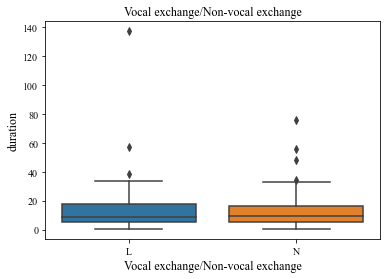

In [43]:
xxx=np.empty([len(diffcl[0,:])+len(diffcr[0,:])],dtype = str) 
xxx[0:len(diffcl[0,:])]='L'
xxx[len(diffcl[0,:]):]='N'
    
compare_durationrow=np.c_[diffcl,diffcr]
print(len(compare_durationrow[0,:]))
    
ax = sns.boxplot(x=xxx, y=compare_durationrow[0,:], linewidth=1.5,whis=1.5)
plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
plt.ylabel('duration',fontsize=12)
plt.title('Vocal exchange/Non-vocal exchange')
plt.show()

In [44]:
#diff=np.r_[diffc1,diffc2,diffc3,diffc4,diffc5,diffc6,diffc7,diffc8,diffc9]
#xlabel=np.r_[xlabel1,xlabel2,xlabel3,xlabel4,xlabel5,xlabel6,xlabel7,xlabel8,xlabel9]

In [68]:
diff=np.r_[-diffc1,-diffc2,-diffc6,-diffc7,-diffc8,-diffc9]
xlabel=np.r_[xlabel1,xlabel2,xlabel6,xlabel7,xlabel8,xlabel9]

In [69]:
def ind(datain,labelin,ind):
    inds=np.zeros(len(datain))+ind
    dataout=np.c_[datain,labelin,inds]
    return dataout

In [70]:
dataall=np.r_[ind(-diffc1,xlabel1,1),ind(-diffc2,xlabel2,2),ind(-diffc6,xlabel6,6),ind(-diffc7,xlabel7,7),ind(-diffc8,xlabel8,8),ind(-diffc9,xlabel9,9)]

In [71]:
dataallp=pd.DataFrame(dataall)
dataallp.columns=['DV','IV','type']

In [49]:
#dataallp.to_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\marisablock12dtw.csv')

In [72]:
from scipy import stats

In [51]:
#dataallpe= pd.read_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\Englishblock12dtw.csv')

In [52]:
#dataallped=np.array(dataallpe['DV'])
#dataalle=dataallped[np.where(np.array(dataallpe['IV'])<=1)[0]]
#t_stat, p_value = stats.ttest_ind(dataalle,dataall[:,0])
#print('rangefp=',p_value)

In [53]:
#print(np.mean(dataalle),np.mean(dataall[:,0]))

In [73]:
med=smf.mixedlm("DV~IV",dataallp,groups=dataallp['type'])
medf = med.fit(method=['powell'])
print(medf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 202     Method:             REML     
No. Groups:       6       Scale:              211.1599 
Min. group size:  5       Log-Likelihood:     -825.4978
Max. group size:  89      Converged:          Yes      
Mean group size:  33.7                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept -14.192    1.735 -8.182 0.000 -17.592 -10.792
IV          0.720    0.398  1.808 0.071  -0.061   1.501
Group Var   0.524    0.259                             



In [74]:
med=smf.mixedlm("DV~IV",dataallp,groups=dataallp['type'],re_formula="~IV")
medf = med.fit(method=['powell'])
print(medf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    202      Method:              REML     
No. Groups:          6        Scale:               210.4341 
Min. group size:     5        Log-Likelihood:      -825.4949
Max. group size:     89       Converged:           Yes      
Mean group size:     33.7                                   
------------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      -14.384    2.102 -6.844 0.000 -18.503 -10.265
IV               0.774    0.523  1.478 0.139  -0.252   1.799
Group Var        4.198    1.127                             
Group x IV Cov  -0.586    0.248                             
IV Var           0.082    0.037                             



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [75]:
print('cofft of duration=',stats.pearsonr(xlabel,diff[:,0]))


cofft of duration= PearsonRResult(statistic=0.1327797842611429, pvalue=0.05959290150216237)


In [76]:
dtwall=np.c_[xlabel,diff]
dtwallp=pd.DataFrame(dtwall)
dtwallp.columns=['Turns','DTW']

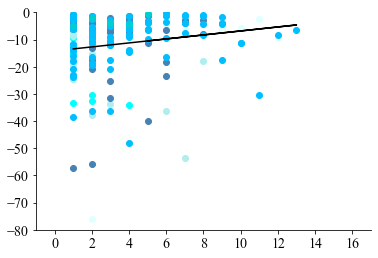

In [77]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1=plt.scatter(xlabel1,-diffc1,color="lightcyan")
p2=plt.scatter(xlabel2,-diffc2,color="aqua")
#p3=plt.scatter(xlabel3,-diffc3[:,6],color="blue")
#p4=plt.scatter(xlabel4,-diffc4[:,6],color="navy")
#p5=plt.scatter(xlabel5,-diffc5[:,6],color="royalblue")
p6=plt.scatter(xlabel6,-diffc6,color="paleturquoise")
p7=plt.scatter(xlabel7,-diffc7,color="steelblue")
p8=plt.scatter(xlabel8,-diffc8,color="deepskyblue")
p9=plt.scatter(xlabel9,-diffc9,color="darkturquoise")
#plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1, 17)
plt.ylim(-80,0)
linear_model=np.polyfit(xlabel,diff.ravel(),1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xlabel,linear_model_fn(xlabel),color="k")

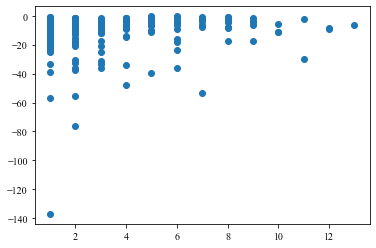

In [79]:
plt.scatter(xlabel,diff)

In [78]:
print(np.mean(diff))

-11.610778292236446
